In [1]:
import pandas as pd
import numpy as np
np.set_printoptions(suppress=True)

In [2]:
CarPrices = pd.read_csv('C:/Users/sovon/Documents/Python/Python Datasets/Regression Datasets/CarPricesData.csv')
print(CarPrices.shape)
CarPrices.head()

(1436, 10)


,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1,0,2000.0,3,1165.0
1,13750,23.0,72937,Diesel,90,1,0,2000.0,3,1165.0
2,13950,24.0,41711,Diesel,90,1,0,2000.0,3,1165.0
3,14950,26.0,48000,Diesel,90,0,0,2000.0,3,1165.0
4,13750,30.0,38500,Diesel,90,0,0,2000.0,3,1170.0


In [3]:
CarPrices.drop_duplicates(inplace=True)
print(CarPrices.shape)

(1435, 10)


In [4]:
CarPrices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435 entries, 0 to 1435
Data columns (total 10 columns):
Price        1435 non-null int64
Age          1433 non-null float64
KM           1435 non-null int64
FuelType     1431 non-null object
HP           1435 non-null int64
MetColor     1435 non-null int64
Automatic    1435 non-null int64
CC           1433 non-null float64
Doors        1435 non-null int64
Weight       1433 non-null float64
dtypes: float64(3), int64(6), object(1)
memory usage: 123.3+ KB


In [5]:
CarPrices.isnull().sum()

Price        0
Age          2
KM           0
FuelType     4
HP           0
MetColor     0
Automatic    0
CC           2
Doors        0
Weight       2
dtype: int64

In [6]:
CarPrices['Age'] = CarPrices['Age'].fillna(CarPrices['Age'].median())

In [7]:
CarPrices['FuelType'] = CarPrices['FuelType'].fillna(CarPrices['FuelType'].mode()[0])
CarPrices['CC'] = CarPrices['CC'].fillna(CarPrices['CC'].mode()[0])
CarPrices['Weight'] = CarPrices['Weight'].interpolate(method='bfill')

In [8]:
CarPrices.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1,0,2000.0,3,1165.0
1,13750,23.0,72937,Diesel,90,1,0,2000.0,3,1165.0
2,13950,24.0,41711,Diesel,90,1,0,2000.0,3,1165.0
3,14950,26.0,48000,Diesel,90,0,0,2000.0,3,1165.0
4,13750,30.0,38500,Diesel,90,0,0,2000.0,3,1170.0


In [9]:
CarPrices.nunique()

Price         236
Age            77
KM           1263
FuelType        3
HP             12
MetColor        2
Automatic       2
CC             12
Doors           4
Weight         59
dtype: int64

In [10]:
CarPrices.columns

Index(['Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC',
       'Doors', 'Weight'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000193CF045308>,
      dtype=object)

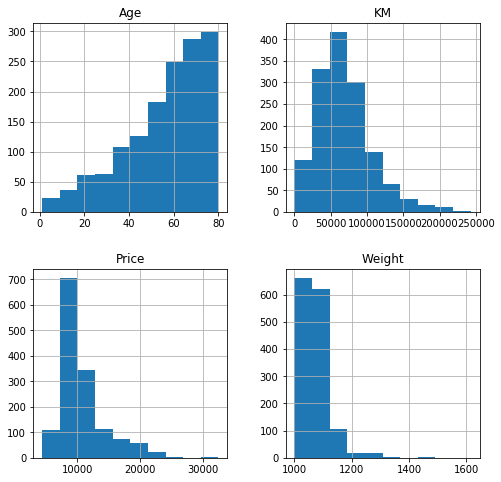

In [11]:
# Checking the distribution of Continuous Variable
%matplotlib inline
CarPrices.hist(['Price', 'Age', 'KM', 'Weight'], figsize=(8,8))

In [12]:
CarPrices.columns

Index(['Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC',
       'Doors', 'Weight'],
      dtype='object')

In [13]:
# Checking the distribution of Categorical Variable
import matplotlib.pyplot as plt
def Distribution(inpData, SelectedCols):
    fig, subplot = plt.subplots(nrows=len(SelectedCols), ncols=1, figsize=(5,15))
    for ColName, plotNum in zip(SelectedCols, range(len(SelectedCols))):
        inpData.groupby(ColName).size().plot.bar(ax = subplot[plotNum])

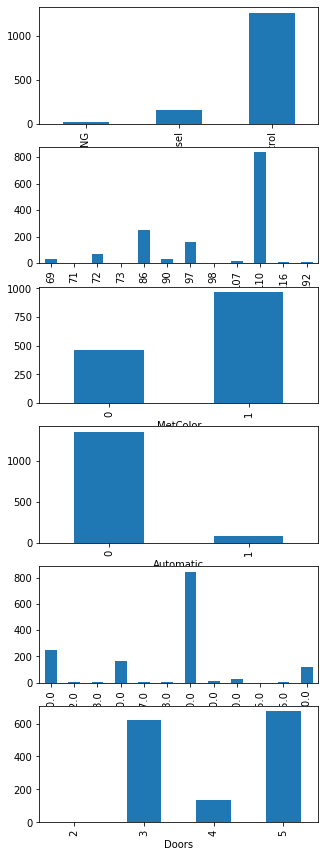

In [14]:
Distribution(CarPrices, SelectedCols= ['FuelType', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors'])

In [15]:
CarPrices['CC'].skew()

0.6065482042107577

In [16]:
np.log(CarPrices['HP'])

0       4.499810
1       4.499810
2       4.499810
3       4.499810
4       4.499810
          ...   
1431    4.454347
1432    4.454347
1433    4.454347
1434    4.454347
1435    4.700480
Name: HP, Length: 1435, dtype: float64

# Checking the Relationships: Continuous vs Continuous

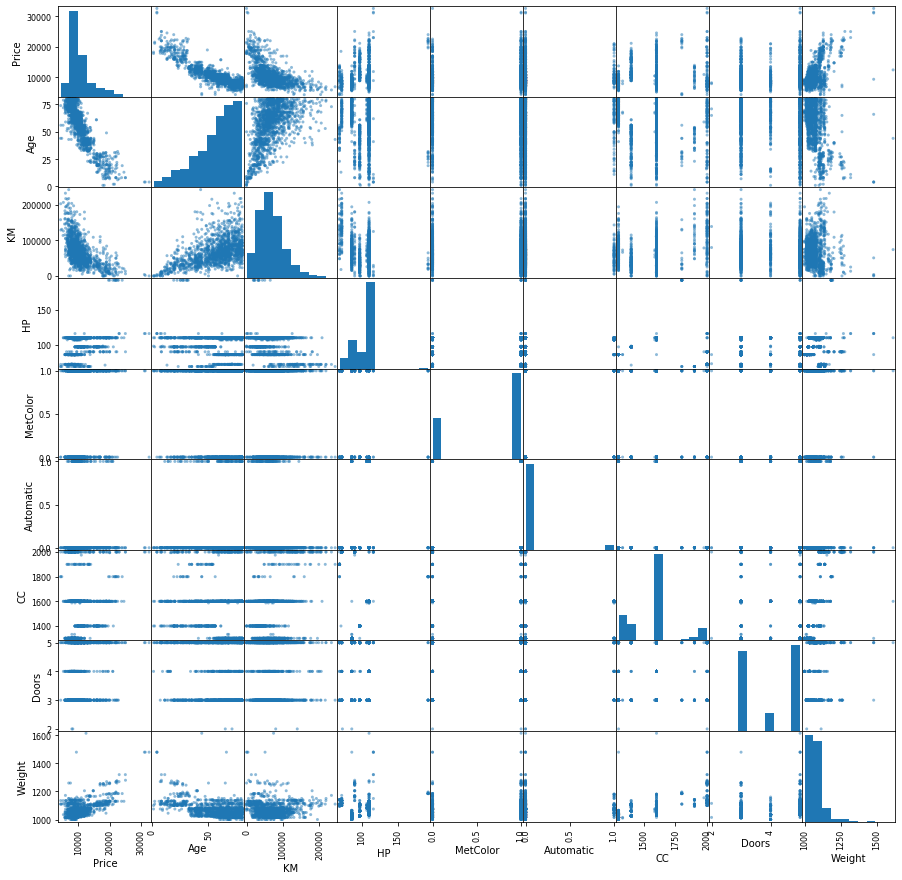

In [17]:
Scatter = pd.plotting.scatter_matrix(CarPrices, figsize=(15,15))

In [18]:
CarPrices.corr()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
Price,1.000000,-0.874196,-0.569420,0.314134,0.107604,0.033928,0.159009,0.183604,0.575714
Age,-0.874196,1.000000,0.502604,-0.156304,-0.105594,0.030793,-0.130726,-0.146901,-0.465749
KM,-0.569420,0.502604,1.000000,-0.332904,-0.079864,-0.082168,0.304984,-0.035193,-0.023852
HP,0.314134,-0.156304,-0.332904,1.000000,0.058272,0.013313,0.048307,0.091803,0.086964
MetColor,0.107604,-0.105594,-0.079864,0.058272,1.000000,-0.019222,0.034672,0.084796,0.057032
Automatic,0.033928,0.030793,-0.082168,0.013313,-0.019222,1.000000,-0.069380,-0.027492,0.058545
CC,0.159009,-0.130726,0.304984,0.048307,0.034672,-0.069380,1.000000,0.126635,0.649499
Doors,0.183604,-0.146901,-0.035193,0.091803,0.084796,-0.027492,0.126635,1.000000,0.301927
Weight,0.575714,-0.465749,-0.023852,0.086964,0.057032,0.058545,0.649499,0.301927,1.000000


In [19]:
['FuelType', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors']

['FuelType', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors']

In [20]:
['Age', 'KM', 'HP', 'Weight']

['Age', 'KM', 'HP', 'Weight']

# Checking the Relationships: Continuous vs Categorical

In [21]:
def catvscon(inpData, SelectedCols, Target):
    fig, subplot = plt.subplots(nrows=len(SelectedCols), ncols=1, figsize=(5,30))
    for ColName, PlotNumber in zip(SelectedCols, range(len(SelectedCols))):
        inpData.groupby(ColName).median()[Target].plot.bar(ax = subplot[PlotNumber])

In [22]:
CarPrices.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1,0,2000.0,3,1165.0
1,13750,23.0,72937,Diesel,90,1,0,2000.0,3,1165.0
2,13950,24.0,41711,Diesel,90,1,0,2000.0,3,1165.0
3,14950,26.0,48000,Diesel,90,0,0,2000.0,3,1165.0
4,13750,30.0,38500,Diesel,90,0,0,2000.0,3,1170.0


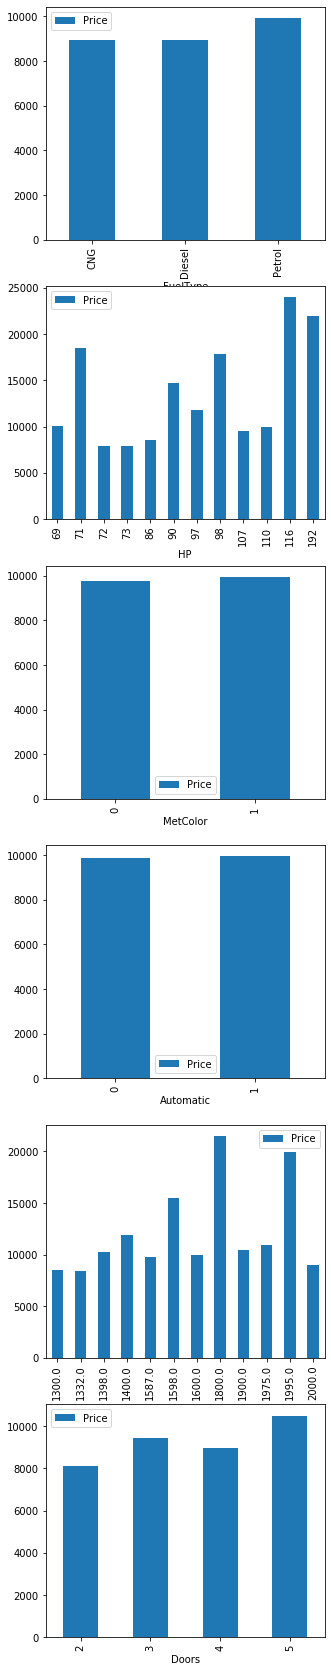

In [23]:
catvscon(CarPrices, SelectedCols=['FuelType', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors'],Target=['Price'] )

In [24]:
def anovaTest(InpData, Target, SelectedCols):
    from scipy.stats import f_oneway
    for colName in SelectedCols:
        categoryGrpList = InpData.groupby(colName)[Target].apply(list)
        Anova  = f_oneway(*categoryGrpList)
        print(colName, Anova[1])
        if(Anova[1]>0.05):
            print('Not Correlated')
        else:
            print('Correlated')

In [26]:
anovaTest(CarPrices, Target='Price', SelectedCols=['FuelType', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors'])

FuelType 0.07590511356326429
Not Correlated
HP 4.403061434008212e-109
Correlated
MetColor 4.4173957971674025e-05
Correlated
Automatic 0.19897717506836016
Not Correlated
CC 2.566835080246702e-47
Correlated
Doors 9.51180734144394e-13
Correlated


In [131]:
Predictors = ['MetColor', 'CC', 'Doors', 'Age', 'KM', 'HP', 'Weight']

In [29]:
X = CarPrices[['MetColor', 'CC', 'Doors', 'Age', 'KM', 'HP', 'Weight']].values
y = CarPrices['Price'].values

In [33]:
y[0:10]

array([13500, 13750, 13950, 14950, 13750, 12950, 16900, 18600, 21500,
       12950], dtype=int64)

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 46)

In [57]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1148, 7)
(287, 7)
(1148,)
(287,)


In [58]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lrRegModel = lr.fit(X_train, y_train)
lrPrediction = lr.predict(X_test)
from sklearn import metrics
print('R2 value', metrics.r2_score(y_train, lrRegModel.predict(X_train)))
print('Accuracy',   100-(np.mean(np.abs((y_test-lrPrediction)/y_test))*100))

R2 value 0.8560954928035791
Accuracy 90.83745932989193


In [80]:
def parameterTuning(X_train, y_train, X_test, y_test):
    randomState = [42,95670, 57657, 78]
    testSize = [0.2,0.3,0.25,0.15]
    for randomState_list in randomState:
        for testSize_List in testSize:
            from sklearn.linear_model import LinearRegression
            from sklearn import metrics
            from sklearn.model_selection import train_test_split
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = testSize_List, random_state = randomState_list)
            mlr = LinearRegression()
            mlrReg = mlr.fit(X_train, y_train)
            mlrPrediction = mlrReg.predict(X_test)
            R2value =  metrics.r2_score(y_train, mlrReg.predict(X_train))
            Accuracy =  100-(np.mean(np.abs((y_test-mlrPrediction)/y_test))*100)
            print( 'random_state', randomState_list, 'test_size', testSize_List, 'R2 value', np.round(R2value,2), 'Accuracy', Accuracy)

In [81]:
parameterTuning(X_train, y_train, X_test, y_test)

random_state 42 test_size 0.2 R2 value 0.87 Accuracy 90.33815701387375
random_state 42 test_size 0.3 R2 value 0.87 Accuracy 90.28370211025502
random_state 42 test_size 0.25 R2 value 0.87 Accuracy 89.92087546375808
random_state 42 test_size 0.15 R2 value 0.88 Accuracy 90.09354199890244
random_state 95670 test_size 0.2 R2 value 0.87 Accuracy 89.70784236051117
random_state 95670 test_size 0.3 R2 value 0.86 Accuracy 90.005252543904
random_state 95670 test_size 0.25 R2 value 0.86 Accuracy 90.04662130728349
random_state 95670 test_size 0.15 R2 value 0.86 Accuracy 89.43112296583718
random_state 57657 test_size 0.2 R2 value 0.86 Accuracy 91.00979975360404
random_state 57657 test_size 0.3 R2 value 0.86 Accuracy 90.8996271947639
random_state 57657 test_size 0.25 R2 value 0.86 Accuracy 90.86315157644052
random_state 57657 test_size 0.15 R2 value 0.86 Accuracy 91.11015600102577
random_state 78 test_size 0.2 R2 value 0.88 Accuracy 88.77631808202396
random_state 78 test_size 0.3 R2 value 0.89 Accura

In [92]:
from xgboost import XGBRegressor
xgb = XGBRegressor(max_depth=2, learning_rate=0.2, booster='gbtree', n_estimators=130)
xgbRegModel = xgb.fit(X_train, y_train)
xgbPrediction = xgbRegModel.predict(X_test)
print('R2 value', metrics.r2_score(y_train, xgbRegModel.predict(X_train)))
print('Accuracy',   100-(np.mean(np.abs((y_test-xgbPrediction)/y_test))*100))

R2 value 0.937416841945775
Accuracy 92.34856433846821


In [136]:
PredictedCarPrices = pd.DataFrame(X_test, columns= Predictors)
PredictedCarPrices['Price'] = y_test
PredictedCarPrices['Predicted_Price'] = xgbPrediction
PredictedCarPrices['APE'] = np.round(np.abs((y_test-xgbPrediction)/y_test)*100,2)
PredictedCarPrices.head()

,MetColor,CC,Doors,Age,KM,HP,Weight,Price,Predicted_Price,APE
0,1.0,1600.0,5.0,54.0,55877.0,110.0,1075.0,11500,11098.840820,3.49
1,1.0,1400.0,5.0,8.0,10000.0,97.0,1110.0,18950,18662.544922,1.52
2,0.0,1600.0,5.0,16.0,11754.0,110.0,1180.0,19750,20588.490234,4.25
3,1.0,1300.0,3.0,75.0,74000.0,86.0,1015.0,7500,7503.468750,0.05
4,1.0,1600.0,3.0,71.0,98154.0,110.0,1050.0,8450,7775.427734,7.98


In [108]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth = 7)
adab = AdaBoostRegressor(n_estimators=220, base_estimator=dt)
adabRegModel = adab.fit(X_train, y_train)
adabPrediction = adabRegModel.predict(X_test)
print('R2 value', metrics.r2_score(y_train, adabRegModel.predict(X_train)))
print('Accuracy',   100-(np.mean(np.abs((y_test-adabPrediction)/y_test))*100))

R2 value 0.9623305838146332
Accuracy 92.19238834439477


In [114]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=8, criterion='mse')
dtRegModel = dt.fit(X_train, y_train)
dtPrediction = dt.predict(X_test)
print('R2 value', metrics.r2_score(y_train, dtRegModel.predict(X_train)))
print('Accuracy',   100-(np.mean(np.abs((y_test-dtPrediction)/y_test))*100))

R2 value 0.9533207130928979
Accuracy 91.79361292528631


In [115]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=4, n_estimators=100)
rfRegModel = rf.fit(X_train, y_train)
rfPrediction = rfRegModel.predict(X_test)
print('R2 value', metrics.r2_score(y_train, rfRegModel.predict(X_train)))
print('Accuracy',   100-(np.mean(np.abs((y_test-rfPrediction)/y_test))*100))

R2 value 0.901434921108354
Accuracy 91.40269439901078


In [137]:
FinalXGB_Model = xgb.fit(X,y)

In [138]:
import pickle
with open('FinalXGB_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(FinalXGB_Model, fileWriteStream )
    fileWriteStream.close()

In [ ]:
def PredictLoanStatus(InputLoanDetails):
    
    # Loading the Function from pickle file
    with open('FinalAdaboostModel.pkl', 'rb') as fileReadStream:
        AdaBoost_model=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()
        
    # Genrating Predictions
    Prediction=AdaBoost_model.predict(InputLoanDetails)
    PredictedStatus=pd.DataFrame(Prediction, columns=['Predicted Status'])
    return(PredictedStatus)

In [145]:
def PredictCarPrice(Input):
    with open('FinalXGB_Model.pkl', 'rb') as fileReadStream:
        FinalModel = pickle.load(fileReadStream)
        fileReadStream.close()
    Prediction = FinalModel.predict(Input)
    PredictedPrice = pd.DataFrame(Prediction, columns=['PredictedPrice'])
    return PredictedPrice

In [146]:
PredictCarPrice(Input=X)

,PredictedPrice
0,15526.315430
1,15052.920898
2,15526.315430
3,15531.911133
4,15388.405273
...,...
1430,8721.156250
1431,8592.088867
1432,8404.714844
1433,8404.714844
